<h3>Quantization Noise </h3>
This experiment is some measurements of the quantization noise generated from the ADC in a highly attenuated measurement. First the raw codes are read and 
plotted.

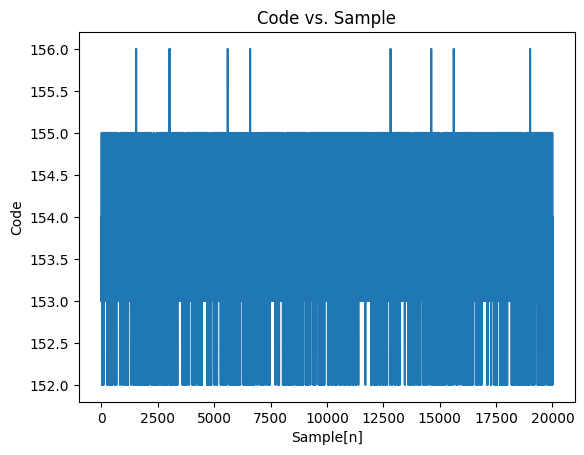

In [2]:
import matplotlib.pyplot as plt
codes = [int(code) for code in open('signal.txt').read().split(',')]
codes = codes[8:len(codes)]
nn = [i for i in range(0, len(codes))]
plt.plot(nn, codes)
plt.title('Code vs. Sample')
plt.ylabel('Code')
plt.xlabel('Sample[n]')
plt.show()


As can be observed, there isn't actually that much noise in the codes, about 4 steps. However, after amplifiying the signal, this noise is also amplfied. 

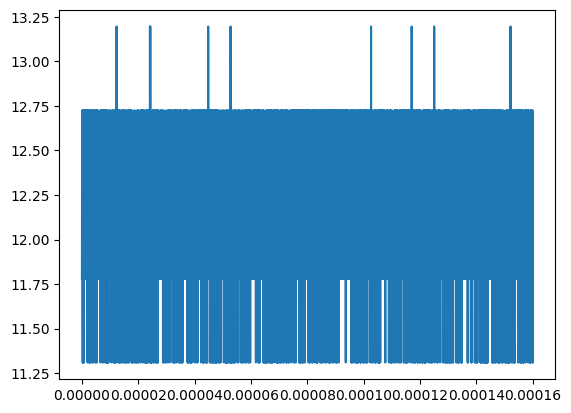

In [25]:
def inverse_quantize(code:int, resolution:float, voltage_ref:float) -> float:
    return float((voltage_ref/resolution)*code)
    
def reamplify(x:float, attenuator_range:float) -> float: 
    return x*(1/attenuator_range)

vv = [reamplify(inverse_quantize(code, 256, 1) - 0.5, 0.008289) for code in codes]
Fs = 125000000
Ts = 1/Fs
tt = [n*Ts for n in nn]

plt.plot(tt, vv)
plt.show()

Obviously, this is far too much spread. However, low pass filtering is an option, so it would be nice to know the frequency of the digitizing noise. 

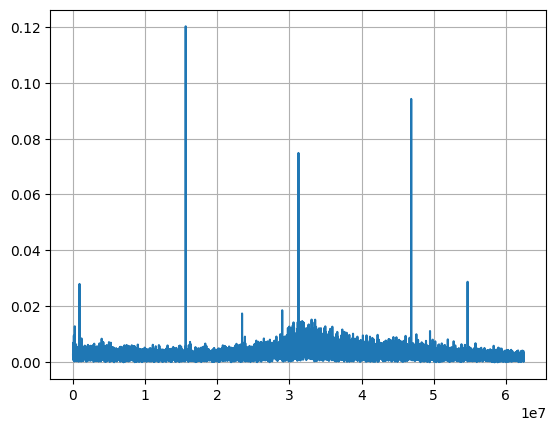

In [33]:
from scipy.fft import fft, fftfreq
import numpy as np

N = len(nn)
vf = fft(vv)
tf = fftfreq(N, Ts)[:N//2]
hh = 2.0/N * np.abs(vf[0:N//2])
hh = hh[2:len(hh)]
tf = tf[2:len(tf)]
plt.plot(tf, hh)
plt.grid()
plt.show()